## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
pymaceuticals_df = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
# Display the data table for preview
pymaceuticals_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
pymaceuticals_df.nunique()

Mouse ID               249
Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pymaceuticals_df.duplicated("Mouse ID")

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 



In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
pymaceuticals_df.drop_duplicates("Mouse ID")

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
pymaceuticals_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_drug = pymaceuticals_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
median_drug = pymaceuticals_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
variance_drug = pymaceuticals_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
stdev_drug = pymaceuticals_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
SEM_drug = pymaceuticals_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

Complete_Drug_Table = pd.DataFrame()
Complete_Drug_Table.assign(Mean=mean_drug,Median=median_drug,Variance=variance_drug,StdDev=stdev_drug,SEM=SEM_drug)




,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
pymaceuticals_df.groupby("Drug Regimen").describe()


Age_months                                                     \
                  count       mean       std  min    25%   50%   75%   max   
Drug Regimen                                                                 
Capomulin         230.0  13.456522  7.721423  1.0   7.00  16.5  20.0  24.0   
Ceftamin          178.0  13.247191  8.071406  2.0   6.00  12.0  20.0  24.0   
Infubinol         178.0  16.230337  7.510278  1.0   8.00  20.0  23.0  24.0   
Ketapril          188.0  15.659574  6.019670  1.0  11.75  18.0  19.0  24.0   
Naftisol          186.0  12.000000  6.715855  2.0   8.00   9.0  19.0  23.0   
Placebo           181.0  10.734807  6.354907  1.0   5.00  10.0  17.0  21.0   
Propriva          161.0  10.894410  7.304624  1.0   5.00   8.0  21.0  24.0   
Ramicane          228.0  10.684211  5.946629  1.0   7.00   9.0  18.0  23.0   
Stelasyn          181.0  12.784530  7.939562  1.0   4.00  14.0  21.0  23.0   
Zoniferol         182.0  12.598901  5.786114  2.0   8.00  12.5  16.0  24.0   

             Weight (g)             ... Tumor Volume (mm3)             \
                  count       mean  ...                75%        max   
Drug Regimen                        ...                                 
Capomulin         230.0  19.965217  ...          45.000000  48.158209   
Ceftamin          178.0  27.398876  ...          56.801438  68.923185   
Infubinol         178.0  27.196629  ...          57.314444  72.226731   
Ketapril          188.0  27.861702  ...          60.870951  78.567014   
Naftisol          186.0  27.166667  ...          59.963034  76.668817   
Placebo           181.0  27.928177  ...          59.916934  73.212939   
Propriva          161.0  27.043478  ...          56.184664  72.455421   
Ramicane          228.0  19.679825  ...          45.000000  47.622816   
Stelasyn          181.0  27.856354  ...          58.719297  75.123690   
Zoniferol         182.0  27.692308  ...          57.954259  73.324432   

             Metastatic Sites                                               
                        count      mean       std  min  25%  50%  75%  max  
Drug Regimen                                                                
Capomulin               230.0  0.713043  0.848993  0.0  0.0  0.0  1.0  3.0  
Ceftamin                178.0  1.179775  1.184283  0.0  0.0  1.0  2.0  4.0  
Infubinol               178.0  0.960674  1.027104  0.0  0.0  1.0  2.0  4.0  
Ketapril                188.0  1.297872  1.393873  0.0  0.0  1.0  2.0  4.0  
Naftisol                186.0  1.182796  1.216519  0.0  0.0  1.0  2.0  4.0  
Placebo                 181.0  1.441989  1.338824  0.0  0.0  1.0  2.0  4.0  
Propriva                161.0  0.975155  1.083688  0.0  0.0  1.0  1.0  4.0  
Ramicane                228.0  0.548246  0.691259  0.0  0.0  0.0  1.0  3.0  
Stelasyn                181.0  0.872928  0.972046  0.0  0.0  1.0  1.0  4.0  
Zoniferol               182.0  1.230769  1.248884  0.0  0.0  1.0  2.0  4.0  

[10 rows x 40 columns]

## Bar and Pie Charts

Text(0, 0.5, '# Mice')

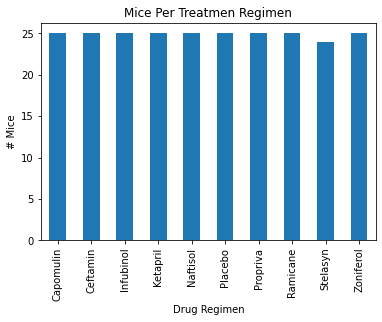

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
data_mouse_bar = pymaceuticals_df.groupby('Drug Regimen').nunique()["Mouse ID"]
mouse_bar = data_mouse_bar.plot.bar(rot='vertical', title = 'Mice Per Treatmen Regimen')
mouse_bar.set_xlabel("Drug Regimen")
mouse_bar.set_ylabel("# Mice")

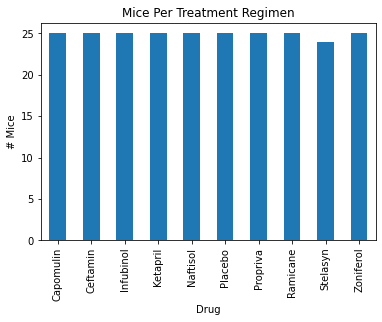

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.xdata = data_mouse_bar.plot.bar()
plt.xlabel('Drug')
plt.ylabel('# Mice')
plt.title('Mice Per Treatment Regimen')
plt.show()

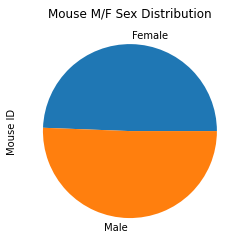

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
data_msex_pie = pymaceuticals_df.groupby('Sex').count()["Mouse ID"]
msex_pie = data_msex_pie.plot.pie(title = 'Mouse M/F Sex Distribution')

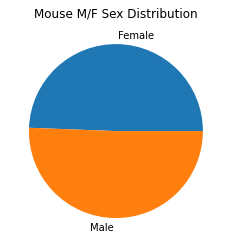

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(data_msex_pie,labels=data_msex_pie.index)
plt.title("Mouse M/F Sex Distribution")
plt.ylabel=("Mouse ID")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#Capomulin
Capomulin_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Capomulin"), :]
Capomulin_maxtime = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_merged = pd.merge(Capomulin_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Capomulin_tumorburden = Capomulin_merged["Tumor Volume (mm3)"]
Capomulin_quartiles = Capomulin_tumorburden.quantile([.25,.5,.75])
Capomulin_upperQ = Capomulin_quartiles[0.75]                                            
Capomulin_lowerQ = Capomulin_quartiles[0.25]
Capomulin_IQR = (Capomulin_upperQ - Capomulin_lowerQ)
Capomulin_upperbound = Capomulin_upperQ + (1.5*Capomulin_IQR)
Capomulin_lowerbound = Capomulin_lowerQ - (1.5*Capomulin_IQR)

#Ramicane
Ramicane_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Ramicane"), :]
Ramicane_maxtime = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_merged = pd.merge(Ramicane_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Ramicane_tumorburden = Ramicane_merged["Tumor Volume (mm3)"]
Ramicane_quartiles = Ramicane_tumorburden.quantile([.25,.5,.75])
Ramicane_upperQ = Ramicane_quartiles[0.75]                                            
Ramicane_lowerQ = Ramicane_quartiles[0.25]
Ramicane_IQR = (Ramicane_upperQ - Ramicane_lowerQ)
Ramicane_upperbound = Ramicane_upperQ + (1.5*Ramicane_IQR)
Ramicane_lowerbound = Ramicane_lowerQ - (1.5*Ramicane_IQR)


#Infubinol
Infubinol_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Infubinol"), :]
Infubinol_maxtime = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_merged = pd.merge(Infubinol_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Infubinol_tumorburden = Infubinol_merged["Tumor Volume (mm3)"]
Infubinol_quartiles = Infubinol_tumorburden.quantile([.25,.5,.75])
Infubinol_upperQ = Infubinol_quartiles[0.75]                                            
Infubinol_lowerQ = Infubinol_quartiles[0.25]
Infubinol_IQR = (Infubinol_upperQ - Infubinol_lowerQ)
Infubinol_upperbound = Infubinol_upperQ + (1.5*Infubinol_IQR)
Infubinol_lowerbound = Infubinol_lowerQ - (1.5*Infubinol_IQR)


#Ceftamin
Ceftamin_df = pymaceuticals_df.loc[(pymaceuticals_df["Drug Regimen"] == "Ceftamin"), :]
Ceftamin_maxtime = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_merged = pd.merge(Ceftamin_maxtime,pymaceuticals_df,on=("Mouse ID","Timepoint"),how="left")
Ceftamin_tumorburden = Ceftamin_merged["Tumor Volume (mm3)"]
Ceftamin_quartiles = Ceftamin_tumorburden.quantile([.25,.5,.75])
Ceftamin_upperQ = Ceftamin_quartiles[0.75]                                            
Ceftamin_lowerQ = Ceftamin_quartiles[0.25]
Ceftamin_IQR = (Ceftamin_upperQ - Ceftamin_lowerQ)
Ceftamin_upperbound = Ceftamin_upperQ + (1.5*Ceftamin_IQR)
Ceftamin_lowerbound = Ceftamin_lowerQ - (1.5*Ceftamin_IQR) 

<ipython-input-15-f24410bf4166>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Capomulin', 'Ramicane','Infubinol', 'Ceftamin'])


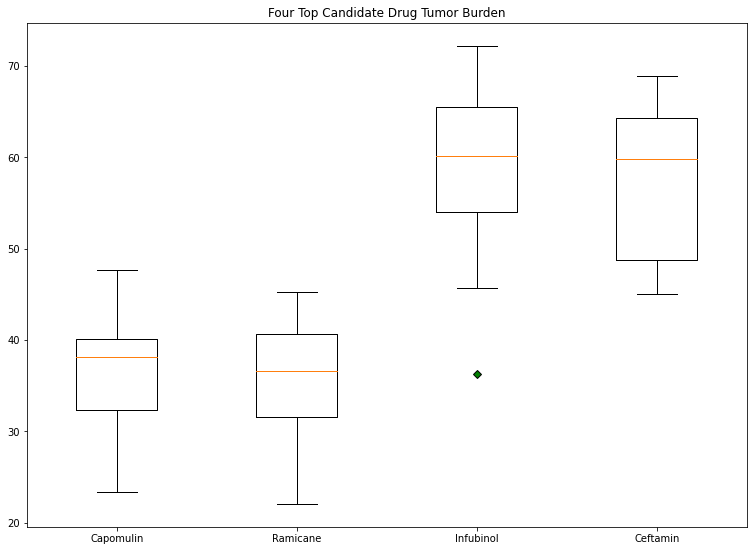

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
bp_data = [Capomulin_tumorburden, Ramicane_tumorburden, Infubinol_tumorburden, Ceftamin_tumorburden]
fig = plt.figure(figsize = (10,7))
ax = fig.add_axes([0, 0, 1, 1])
green_diamond = dict(markerfacecolor='g', marker='D')

ax.set_title("Four Top Candidate Drug Tumor Burden")
ax.set_xticklabels(['Capomulin', 'Ramicane','Infubinol', 'Ceftamin']) 
bp = ax.boxplot(bp_data, flierprops=green_diamond)
plt.show()



## Line and Scatter Plots

TypeError: 'str' object is not callable

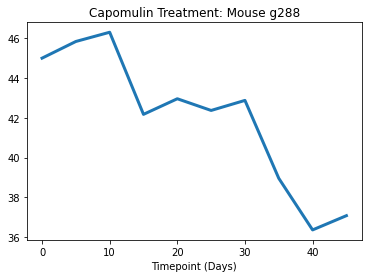

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_line = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g288",:]
timepoint = Capomulin_line["Timepoint"]
tumorburden = Capomulin_line["Tumor Volume (mm3)"]
plt.title("Capomulin Treatment: Mouse g288")
plt.plot(timepoint,tumorburden,linewidth=3, markersize=11)
plt.xlabel("Timepoint (Days)")
plt.ylabel('Tumor Volume (mm3)')
plt.show()


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
